<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 問題
有一組包含200位使用者的匿名資料：
```
[使用者的薪水,工作年資,是否已升級為付費帳號]
```




In [2]:
#原始資料
data = [[0.7,48000,1],[1.9,48000,0],[2.5,60000,1],[4.2,63000,0],[6,76000,0],[6.5,69000,0],[7.5,76000,0],[8.1,88000,0],[8.7,83000,1],[10,83000,1],[0.8,43000,0],[1.8,60000,0],[10,79000,1],[6.1,76000,0],[1.4,50000,0],[9.1,92000,0],[5.8,75000,0],[5.2,69000,0],[1,56000,0],[6,67000,0],[4.9,74000,0],[6.4,63000,1],[6.2,82000,0],[3.3,58000,0],[9.3,90000,1],[5.5,57000,1],[9.1,102000,0],[2.4,54000,0],[8.2,65000,1],[5.3,82000,0],[9.8,107000,0],[1.8,64000,0],[0.6,46000,1],[0.8,48000,0],[8.6,84000,1],[0.6,45000,0],[0.5,30000,1],[7.3,89000,0],[2.5,48000,1],[5.6,76000,0],[7.4,77000,0],[2.7,56000,0],[0.7,48000,0],[1.2,42000,0],[0.2,32000,1],[4.7,56000,1],[2.8,44000,1],[7.6,78000,0],[1.1,63000,0],[8,79000,1],[2.7,56000,0],[6,52000,1],[4.6,56000,0],[2.5,51000,0],[5.7,71000,0],[2.9,65000,0],[1.1,33000,1],[3,62000,0],[4,71000,0],[2.4,61000,0],[7.5,75000,0],[9.7,81000,1],[3.2,62000,0],[7.9,88000,0],[4.7,44000,1],[2.5,55000,0],[1.6,41000,0],[6.7,64000,1],[6.9,66000,1],[7.9,78000,1],[8.1,102000,0],[5.3,48000,1],[8.5,66000,1],[0.2,56000,0],[6,69000,0],[7.5,77000,0],[8,86000,0],[4.4,68000,0],[4.9,75000,0],[1.5,60000,0],[2.2,50000,0],[3.4,49000,1],[4.2,70000,0],[7.7,98000,0],[8.2,85000,0],[5.4,88000,0],[0.1,46000,0],[1.5,37000,0],[6.3,86000,0],[3.7,57000,0],[8.4,85000,0],[2,42000,0],[5.8,69000,1],[2.7,64000,0],[3.1,63000,0],[1.9,48000,0],[10,72000,1],[0.2,45000,0],[8.6,95000,0],[1.5,64000,0],[9.8,95000,0],[5.3,65000,0],[7.5,80000,0],[9.9,91000,0],[9.7,50000,1],[2.8,68000,0],[3.6,58000,0],[3.9,74000,0],[4.4,76000,0],[2.5,49000,0],[7.2,81000,0],[5.2,60000,1],[2.4,62000,0],[8.9,94000,0],[2.4,63000,0],[6.8,69000,1],[6.5,77000,0],[7,86000,0],[9.4,94000,0],[7.8,72000,1],[0.2,53000,0],[10,97000,0],[5.5,65000,0],[7.7,71000,1],[8.1,66000,1],[9.8,91000,0],[8,84000,0],[2.7,55000,0],[2.8,62000,0],[9.4,79000,0],[2.5,57000,0],[7.4,70000,1],[2.1,47000,0],[5.3,62000,1],[6.3,79000,0],[6.8,58000,1],[5.7,80000,0],[2.2,61000,0],[4.8,62000,0],[3.7,64000,0],[4.1,85000,0],[2.3,51000,0],[3.5,58000,0],[0.9,43000,0],[0.9,54000,0],[4.5,74000,0],[6.5,55000,1],[4.1,41000,1],[7.1,73000,0],[1.1,66000,0],[9.1,81000,1],[8,69000,1],[7.3,72000,1],[3.3,50000,0],[3.9,58000,0],[2.6,49000,0],[1.6,78000,0],[0.7,56000,0],[2.1,36000,1],[7.5,90000,0],[4.8,59000,1],[8.9,95000,0],[6.2,72000,0],[6.3,63000,0],[9.1,100000,0],[7.3,61000,1],[5.6,74000,0],[0.5,66000,0],[1.1,59000,0],[5.1,61000,0],[6.2,70000,0],[6.6,56000,1],[6.3,76000,0],[6.5,78000,0],[5.1,59000,0],[9.5,74000,1],[4.5,64000,0],[2,54000,0],[1,52000,0],[4,69000,0],[6.5,76000,0],[3,60000,0],[4.5,63000,0],[7.8,70000,0],[3.9,60000,1],[0.8,51000,0],[4.2,78000,0],[1.1,54000,0],[6.2,60000,0],[2.9,59000,0],[2.1,52000,0],[8.2,87000,0],[4.8,73000,0],[2.2,42000,1],[9.1,98000,0],[6.5,84000,0],[6.9,73000,0],[5.1,72000,0],[9.1,69000,1],[9.8,79000,1],]

轉為所需的格式

In [3]:
xs = [[1.0]+row[:2] for row in data]
ys = [row[2] for row in data]

## 第一步驟：線性迴歸
```
paid accound = β₀+β₁experience+β₂salary
```

In [4]:
import numpy as np

def least_square_approximation(vector_x,vector_y):
  x = np.array(vector_x)
  y = np.array(vector_y)

  # A = (X^T*X)⁻¹
  transpose_x = np.transpose(x)
  temp = transpose_x @ x
  A = np.linalg.inv(temp)

  # D = X^T * y
  D = transpose_x @ y

  # β = A*D = 最終解 = (X^T*X)⁻¹ * X^T * y
  β = A @ D
  return list(np.round(β,3)) #將最終的解,取小數點後三位

### 圖 16-1 已付費與未付費使用者


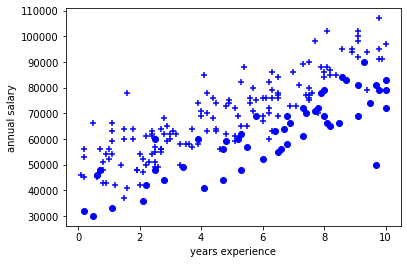

In [5]:
from matplotlib import pyplot as plt

for row in data:
  if row[2]==1:
    plt.scatter(row[0],row[1],marker='o',c='#0000ff',label="paid")
  else:
    plt.scatter(row[0],row[1],marker='+',c='#0000ff',label="unpaid")

#plt.titie("Paid and Unpaid users")
plt.xlabel("years experience")
plt.ylabel("annual salary")


plt.show()

### 圖 16-2 用線性回歸來預測是否為付費帳號

In [6]:
from matplotlib import pyplot as plt
from typing import List
import random
import tqdm

Vector = List[float]
Matrix=List[List[float]] #另一種型別別名

def get_row(A:Matrix,i:int)->Vector:
  return A[i]

import math

from typing import Callable

#送回一個num_rows * num_cols 的矩陣，其中第(i,j)項就是entry_fn(i,j)
def make_matrix(num_rows:int,num_cols:int,entry_fn:Callable[[int,int],float])->Matrix:

  return [[ entry_fn(i,j)        # 給定 i ，就能建立長度為 j 的列表
        for j in range(num_cols)] # [entry_fn(i,0),...]
        for i in range(num_rows)] # 針對每個i都建立一個列表

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)

def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]


def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]
  
def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

#針對每一行取A_i，接著去A_i這行的第j個元素放入新的陣列
def get_col(A:Matrix,j:int)->Vector:
  return [A_i[j] for A_i in A]

def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_col(data_matrix,j))
             for j in range(num_cols)]
    stdevs = [standard_deviation(get_col(data_matrix,j))
              for j in range(num_cols)]
    return means, stdevs


def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    ignores columns with no deviation"""
    means, stdevs = scale(data_matrix)

    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]

    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

def least_squares_fit(
          xs:List[Vector],
          ys:List[float],
          learning_rate:float=0.001,
          num_steps:int=1000,
          batch_size:int=1)->Vector:
  """
  找出最小化平方誤差和的beta值
  假設模型y = dot(x,beta)
  """
  # 一開始先使隨機方式做出猜測
  guess = [random.random() for _ in xs[0]]

  for _ in tqdm.trange(num_steps,desc="least squares fit"):
    for start in range(0,len(xs),batch_size):
      batch_xs = xs[start:start+batch_size]
      batch_ys = ys[start:start+batch_size]

      gradient = vector_mean([squerror_gradient(x,y,guess) for x,y in zip(batch_xs,batch_ys)])

      guess = gradient_step(guess,gradient,-learning_rate)
  
  return guess

def predict (x:Vector,beta:Vector) -> float:
  """假設每個x_i的第一個元素都是1"""
  return dot(x,beta)

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))

from typing import List

def error(x:Vector,y:float,beta:Vector) -> float:
  return predict(x,beta) - y

def squared_error(x:Vector,y:float,beta:Vector) -> float:
  return error(x,y,beta)**2

def squerror_gradient(x:Vector,y:float,beta:Vector) -> float:
  err = error(x,y,beta)
  return [2*err*x_i for x_i in x]

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 684.44it/s]


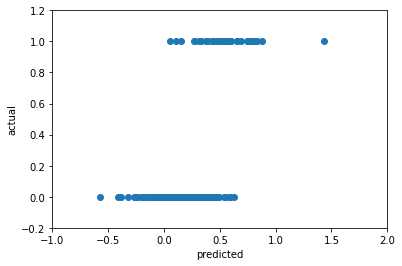

In [7]:
learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs,ys,learning_rate,1000,1)
#[0.26,0.43,-0.43]
predictions=[predict(x_i,beta) for x_i in rescaled_xs]

plt.scatter(predictions,ys)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.axis([-1.0,2.0,-0.2,1.2])
plt.show()

這個做法導致一些明顯的問題：
* 我們希望預测的輸出結果不是0就是1,這樣就可以對會員進行分類。如果是介於0 到1之間的數值,也沒什麼間,因為我們可以把這些數值解釋機率:例如025 的輸出值,就表示有25%的機會成為付費會員但線性模型的輸出也有可能是很大的正數,或甚至是負數,這樣就很難進行解釋了,實際上,這裡確實得出了很多負 數的預测值。
* 線性迴歸模型有個假設,就是誤差項的各個項都不相關。但此處年資的通歸係數為0.43,意思就是年資越高的人越有可能升級為付費帳號,這表示我們的模型會針對 年資很高的人,輸出一個很大的值,但我們知道真正的值最高就是1,這也就表示。 數值很高的這個輸出項(也就是數值很大的年資 )必然對應到一個非常大的負值誤差 項由於這個緣故,所以我们的beta 估計值肯定是有所偏類的。

我們可以改用另一種做法,就是當dot(x_i, beta)出現很大的正值時讓相應的機率趨近 於1,如果出現很大的负值,就讓相應的機率趨近於0. 我們只要把計算結果套入到某個函數中,就可以達到這樣的效果。

# 邏輯函數
* 如果輸入往正值方向變得越來越大，它會越接近1。
* 如果輸入往負負值方向變得越來越大，它會越接近0。



函式定義：

In [8]:
 def logistic(x:float)->float:
   return 1.0/(1+math.exp(-x))

導函數定義：

In [9]:
 def logistic_prime(x:float)->float:
   y=logistic(x)
   return y*(1-y)

### 圖16-3 邏輯函數

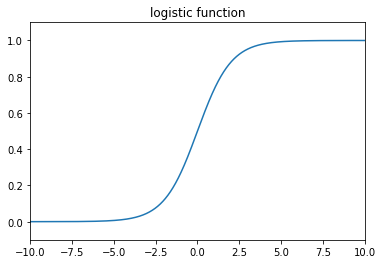

In [10]:
import math
xs = [num/1000 for num in range(-10000,10001)]
ys = [1.0/(1+math.exp(-xs_i)) for xs_i in xs]

plt.plot(xs,ys)
plt.axis([-10,10,-0.1,1.1])
plt.title("logistic function")
plt.show()

## 套入模型
![pic](https://lh3.googleusercontent.com/e0Tc_fR6GN4vHfsmzgOxTEtDq9jaKjNyA47ESPrTMwInA6ExnCD9IiT9HTAQGBP3Fiphmn37y-bv57pSWSDdYmeiuHa-F8nerLtarF4Maw7SooiHAP8X2IY7tiGnwr4tD6fuUA8KhR5IjcrFsHOVwON611zFjo1E6HepuhyMYcHlRr4R7Z81p3dcZf92K6YYIe84o9ykGx5yJWuUHspLfhZpt2YakR3-UH0HpuNE93PWphOf_etjwla9gY9pjpQXov3mD9-DaF80h4om9iK0SjUaKQTVVzOtONo_ScK7xqar0iK1256Ndk0hDTeLJ5cjIF9jMEAIn_IBjgLpdmVmMFBVkTgOrcCsER7O-9Iod_aO4OUaL2zcxGD-HULWoXL8klzWULIKGo9I8PN48VNZqB5kS3vz8pLIJAZO3fV-3bU_rkOsPbXticsXuzGoCwxjLvVJfXN08SStoU6Cwf6RRRcTMPn6jw7y4a7Xy9RRoTHcBXF8yrOjZSa26FWRRSslOQA_q6sZuWj_DB1NAG0RL82m_dp8hl-H_pEXN-TUfcyldNpjbO0htyzMwNb1LK5PdVzoh155OOplhzPNddJSlkjeOtX23k_AJDqTGFdX88tOXczPM3Rz7TcqfBbqLV3eENxMDS6ehz5Hw3C4dutO6koLNB_SwAFMaGVSHTw3mvlD2ZCtroO2cHsSO1I_7g=w184-h50-no?authuser=0)  
其中 f 是邏輯函數
  
若給定β，模型能告訴我們：
* 每個yi數值為1的機率為 f(xiβ)
* 每個yi數值為0的機率為 1 - f(xiβ)

yi的機率分布函數PDF:  
![](https://lh3.googleusercontent.com/91Wl3rj6p4dqAHLCUT7va4Ycxy1SwTkRUnbYfO85DLJjkHful8F0PTbgs3P0rdk0TBysUjWWzLvVZmAY25VH7sM2RuZknceVem8t-zr82QJojCohvH14_QNL5S1Jntbj3bAsO7ZtFWA4TblzM1_rd_hvDSoStM7PJLbEsci-ZbunPzoYdgo7lGvHIfByQTFjqzYGPMuEWbz2Ss5vJULnb6j1tojkX_Ak6MH0YCODKllnuQYSBAbj95kr-btSHBOYrb4411rYqcUw2hAzlBoK_U1YKis6Ze_OhGXf-PQ1mdFlfsS5-1ZzakqRyfPpAH7ZMdC7tODJK1t5ZhAJcaRE4yqTDt1PmdN853X4_YKCWSLikEpcyJI1oaFoP94PswwOBJuAVvgNU-GGEBLTEbo8rFrktRo12lCxyFkkIF9zf81m_xp-jH5-V3PupcnqSAu0iZdrB8IspLOBbaOy7U5tR78GtOMF7O0dne01X21kR8TViPKlishlWJOyy9U8B9O3k6igPm8gyoW7Bx7ufa3rXHTmcxx_hLR3_L3Zos8vdjZxd9kQo00QH0CqhdseMmpR8enBwCbb3Dz3_aQDyrSw_4ORGf4paLpQCLDxY-CQpsWASO-8tFtBI3ROKuPr6KN8FBwqw8vokyiAf1G5R_Pyd9PT8Iat4jdlt-hO6hO0vhEinPonBd-WC9r1DP036Q=w371-h56-no?authuser=0)  
對這個可能性函數取對數，再求取最大化的結果：  
![](https://lh3.googleusercontent.com/DxDe-aSOOOhfKYxEc-jiLUdDY9zKBoBi6DytFji6h2uplZSuvtNZjgbvIeqttSI_yvx3tr8AvRf1CKvvfxJPtZNTyGwv1L8kGcSNpTdhJ56zs0hWFvfofOQ-7A_Y-YOTo4WxOPgN7L-D0tiWSqFU-YDc4UOc85VTUin4ysMDa1c9IsXti86Vll15UDf-YH-OdWcOGGwnX2XYoWIS7q-EHR0IRkyg-qfnzUo9DWktD8Mxg_g6_rb0EtUqiQMtDxwX939nZb-MJ75oK4KhrnNrGK4OGf7_QV53RvY7Njl-DAlSiXBqLhH1KSPBO9YXCfxoETOv6xCRZFGwTurCT48crarBLDq8LSAHGyUUxQLYCDOajjLlAyjgnkdQbcyHcqRcSju-EXYOO5zw8QxscRAFdXCHVeCVht1sI_VckSYGpTLBFGLx167uqnTrqNfDWr0_UQW1xJ-3oRgmqkXx1nAjoA0rITwWj9310qH4uZpheNnK0XM_NFM3SwF9DF9xI6RtlY9nfXa-D-Q__KYzVj4eWRGuqbFU0cGC75_69T0-3veuke14bo13PvJJymM-Ly-XK-XDsYUA66N6UUMp4nybQ_3GcpFKDQv3K-lvtBdgek3Sz2BhTzl7IxLxBEny0JHFuhRpPyZdIEvh9l7mDo-g2OM70qzFgwKBsdoLNRfv5qfewJ_rMnwwYeufsKKWFg=w545-h34-no?authuser=0)  
由於對是是嚴格遞增函數，讓對數可能性獲得最大結果的beta也能讓可能性獲得最大的結果。  
由於梯度遞減目標是最小化，再實際上是使用負對數可能性。


In [11]:
import math

def _negative_log_likelihood(x:Vector,y:float,beta:Vector)->float:
  """一個資料點相應的負對數可能性"""
  if y==1:
    return -math.log(logistic(dot(x,beta)))
  else:
    return -math.log(1-logistic(dot(x,beta)))

假設不同資料點間是**獨立的**，  
* 整體可能性 = 個別可能性直接相乘
* 整體對數可能性 = 所有個別對數可能性加總之和

In [12]:
def negative_log_likelihood(xs:List[Vector],ys:List[float],beta:Vector)->float:
  return sum(_negative_log_likelihood(x,y,beta) for x,y in zip(xs,ys))

只需運用微積分，即可求出梯度

In [13]:
def _negative_log_partial_j(x:Vector,y:float,beta:Vector,j:int) ->float:
  """
  這裡的i是資料點的索引值，j則是相應導數項的索引值
  """
  return -(y-logistic(dot(x,beta)))* x[j]

In [14]:
def _negative_log_gredient(x:Vector,y:float,beta:Vector)->Vector:
  """一個資料點的梯度"""
  return [_negative_log_partial_j(x,y,beta,j) for j in range(len(beta))]

In [15]:
def negative_log_gradient(xs:List[Vector],ys:List[float],beta:Vector)->Vector:
  return vector_sum([_negative_log_gredient(x,y,beta) for x,y in zip(xs,ys)])

# 套用模型

In [16]:
import random
import tqdm
from typing import TypeVar,List,Tuple

X = TypeVar('X') #以通用型別來代表資料點
Y = TypeVar('Y') #以通用型別來表示輸出變數

def split_data(data:List[X],prob:float) ->Tuple[List[X],List[X]]:
  """把資料依照[prob,1-prob]的比率進行切割"""
  data = data[:]        #複製一份資料
  random.shuffle(data)      #因shuffle會打亂資料
  cut = int(len(data)*prob)   #用prob算出切分點
  return data[:cut],data[cut:]  #用打亂過的資料進行切分

def train_test_split(xs:List[X],ys:List[Y],test_pct:float)->Tuple[List[X],List[X],List[Y],List[Y]]:

  #生成索引並進行切分
  idxs = [i for i in range(len(xs))]
  train_idxs,test_idxs = split_data(idxs,1-test_pct)

  return ([xs[i] for i in train_idxs], #x_train
       [xs[i] for i in test_idxs], #x_test
       [ys[i] for i in train_idxs], #y_train
       [ys[i] for i in test_idxs]) #y_test

random.seed(0)

xs = [[1.0]+row[:2] for row in data]
ys = [row[2] for row in data]
rescaled_xs = rescale(xs)

x_train,x_test,y_train,y_test = train_test_split(rescaled_xs,ys,0.33)
learning_rate=0.01

#隨機選個起始點
beta = [random.random() for _ in range(3)]

with tqdm.trange(5000) as t:
  for epoch in t:
    gradient = negative_log_gradient(x_train,y_train,beta)
    beta = gradient_step(beta,gradient,-learning_rate)
    loss = negative_log_likelihood(x_train,y_train,beta)
    t.set_description(f"loss:{loss:.3f}, beta: {list(np.round(np.array(beta),1))}")

loss:39.963, beta: [-2.0, 4.7, -4.5]: 100%|██████████| 5000/5000 [00:18<00:00, 277.58it/s]


將調整過尺度的資料相應之係數值轉回原始資料

In [23]:
xs = [[1.0]+row[:2] for row in data]
means,stdevs = scale(xs)

beta_unscaled =[(beta[0]-beta[1]*means[1]/stdevs[1]-beta[2]*means[2]/stdevs[2]),beta[1]/stdevs[1],beta[2]/stdevs[2]]
print(list(np.round(np.array(beta_unscaled),6)))

[8.927237, 1.648203, -0.000288]


```
paid accound = 8.927327 + 1.648203*experience - 0.000288salary
```
這些係數不像線性回歸係數那樣易於解釋。  
在其他條件都相等的情況下：
* 每多一年的年資，邏輯函數的輸入項就會增加 1.6
* 薪水每增加10000，邏輯函數的輸入項就會減少 2.88

且輸出的結果(發生機率)可能會受到輸入項的影響：
* dot(beta,x_i)原本的值很大→增加多少都不會對發生機率
* dot(beta,x_i)原本的值很→任何數值變動會使對應的機率大幅上升
  
在其他條件都相等的情況下，有以下結論：
* 年資較高的人確實比較有可能升級付費帳號
* 薪水比較高的人比較不會去升級為付費帳號

# 套入優度

假定機率超過0.5，就預測它是**付費帳號**

* TP 真陽性：確定是付費帳號，亦被預測是付費帳號
* FN 假陰性：確定是付費帳號，卻被預測是不付費帳號
* FP 假陽性：確定不是付費帳號，卻被預測是付費帳號
* TN 真陰性：確定不是付費帳號，亦被預測不是付費帳號

In [18]:
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i,y_i in zip(x_test,y_test):
  prediction = logistic(dot(beta,x_i))
  if y_i == 1 and prediction >=0.5:
    true_positives += 1
  elif y_i==1:
    false_negatives += 1
  elif prediction >= 0.5:
    false_positives += 1
  else:
    true_negatives += 1

precision = true_positives / (true_positives+false_positives)
recall = true_positives / (true_positives+false_negatives)

print("precision:",precision)
print("recall:",recall)

precision: 0.75
recall: 0.8


### 圖 16-4 邏輯回歸預測結果與真實結果

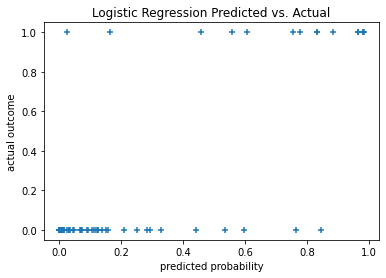

In [19]:
predictions = [ logistic(dot(beta,x_i)) for x_i in x_test]
plt.scatter(predictions, y_test,marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

# 支援向量機
dot(beta,x_i)等於零的點，實質上是我們分類的分界線

## 超平面

### 圖 16-5 已付費與未付費使用者，以及決策邊界線
![](https://lh3.googleusercontent.com/nnixBYwhNFkVXpVQYkbi0al_7zDCP8S5SXITTUtAg7Abtg5UZ9Hy6F2rG4X9Y1LO9C6vSTs7tza-z39DMg5d8loUFYY6824R0D3ZnwpsG-bWuCa3KJ_Dw3yOqybLLnxT0bfXH7n3a19qQaPz3IiwJ1baVE3ShS_fvOSMWskQFZ3whURc7OS_lnOGKgYVFlKAgzP33pQJYhFk_fNWEfE9BzFGNC0VuOdH_hpzshSFImidOn2vdaLFgAnSLNlEubO0Ge1_VFhM9ZO7BgRAY-THFBgKqmyFTD7DSEVDRCNFSZ0Fzz7lpRutCV-G30YGQEpIg_tCdg7dGaBmJ2jch2vPRHjinrihQg8Z8Nd8G-e1zbDfWvuTFjMWhD53xU3ZZZVRqpoI10FxwP1MSS33IwKXS5o1r_ZuKyg5Q6k1gzpccXHR9bWFCrfl-ty8vno5W24n3iiqQwjPR-0x80_MGkKl3IhcFn6TdhN1bzrh3k_Nw8_U1Nf03kru48lQSJT0RlamoCscXY0gy5OQeq--EpbBZRjov0Mkh7l4DhOZCCLD9KJ7qnP94FT-Vlc5M4TnRI4SrUrD92UkWQSXl8y1M-SGjRMbA_DWuCfk2hjFUyqBQIDBzCMokXi3-2k3xfkbUJoyDhEAF-E6HDnm-F_d7PsOpa6OKFcupfmEzc2zbE0wuoMtRMUa3d0NXP2gotMgzw=w725-h562-no?authuser=0)  
該邊界實際上是一個**超平面**，它會把參數空間一分為二。  
分別對應*已付費*與*未付費帳號*的預測結果


## 支撐向量機(support vector machine)
用於找出對訓練組資料做出最佳分類的超平面  



### 圖16-6 可順利進行分類的一個超平面
![](https://lh3.googleusercontent.com/Psf0p9E5_ngh6OTan39dBKLSZDO-XEepUlCaEZPHGo4UW1MSb6fmIH1KfKdbbAs3UWKh3-wCnDEJvyAvZlyatpISVTVgniESrCkoC6hwsPzTmbusFJSDzraZa639esOFuT505YbW9ncXsvpyN4ts8WfJOrXDFhTr_9Nz-JQcWAaRlX2PYbaM2nRoiPZVC6rfy4yMEcHFeVn4yQK5aUj9hU7ez_C9-uvKGqxmK3qQ10DrDjIxYYgWuTttW17wYReQ-vT6hsBtn6D3LTlAFVo5nJvjx1pjnACJpXaIvnMit1hMaJsX4YsKZ5DCsOV9NwdJzqRatND34DZ4niVgnrrFO04ILszn5CuuC79GFGU75FnB-70qAvgYIzc7tTA3rLTg9k-9IDfu-RCQ-1TMJ7PUfGuuFr_Ic8jXejKQs9fQiyhtIwBGzCkdpv4Cg1AGx3Jk0Ej3A5P3gJoyJnIsLYQAe_Ac7ADj-dx5GE_4J3Qg28YdlzmtWwzMk-COE4trakfAWtVjATX8YWI5lxZ3YtV4g55AgV8iB27OO0fXC5XQMjgq7wVN3B54ALInX749BJkcYdIrT94Qj1BQ1GLZAmSjDsXrd3eb1m0T_U7jpi3OrVxowQ9NE9jdQ8-U9LvnMa-Sn9EgC0xeJBqlCSwZBrIm4pOw-8HEtWXE4QR3gfIAJKVNxfApg4r2OC3Fc7ub6g=w679-h533-no?authuser=0)  
我們有時可以試著將資料切換到更高為平面，試試看是否有其他可能性。

### 圖 16-7 無法進行區分的一維資料集
![](https://lh3.googleusercontent.com/qhmqOzYmcsz9jFDG6atR9jIe6oqGyaqu2_iz8YfY52yFbykMubjXFIdZ2VMSTsjSvZs9CaCyJ_zDSJ4Q50jlzS6UBH5wXo9c9QvVZqxNrO1IlxuQGC0xCwECqPJsANsBhnbic2qaIc9CakDyQVK0bYqbesU3ingxZkDlpxQCfmHwa45SS8-Yf3GLSxskyBiuqbQ72JICJL3qw2nuCyeIvBqotKMfmrhszGiHxZZP3uGURGK3vcTtY6WgC8rNYpniSM1eMFbITQsjZhWB1y0DX9Z93_qKsSX9WGNidwrc-tEDTwOkVym5cz8gIQc57WkaYpc4n69Ts1_s0IZfJSoeD4RWo5nVMwZZfgPkr88iWGHK5SK293yHuBtlgdaZYfHRTRiIoGjBUzSD1lP86SHXzLT8bjqr7FmUO8ChbpGl1h2wwISg6jXChDki8__zEMh1b5nFLSsEJy32IXQ9KpfFIbozb5f_WKP9k4aR7B092YBVgPMRyNqfY9bt-b9XwrJUH_rwfIOLyUuxl41zLoGE4o4Wzl2rFRmSaa8xTwBhftIbWldG730wOjG9NzoiE5X32FYh6DgnbLIRbwy6Mh1YKlSIMS9yrFHr7nNJ9pL7_CAcQq2MaESPpXck1OqQ7eWnNRkq9cyZJ5h1oq8m2vkgWUKWObqU5sthDISTympzS2L-RwsMg3UtZ6x0Z32QmA=w635-h512-no?authuser=0)

這裡顯然並不存在一個超平面,能做好「陽性樣本」與「陰性樣本」的切分工作。  
不過,我們可以來看看,如果把這些資料中的每個x,都映射到(x, x**2)這樣的二維空間, 會發生什麼狀況。  
突然之間,我們就可以找出能區分資料的超平面了(參見圖16-8)

## 核心技巧(kernel trick)
利用核心(kernal)函式,計算出更高維度空間的點積。

### 圖 16-8 在更高維度，資料可以順利進行分類
![](https://lh3.googleusercontent.com/Ukxc8nRwhnmRCNPmBS0VE3Rzf8Z8IgPjg5z3WWSsF0wdy5QTP4Xa9CYS77OhvHCaBFvLB9gAkiUtx1eV7baHu4r1NcEtQgEb6-eSioZ044bAp5I97KFcZeQLV2xE5Qc1HHrEAOqOGxj8Vp_SrKIXiXhUhPOoqUNVM3AKD9Ugwt6mO3avEFE2zu95jVphJasDFFxfFGGJFRL-wtFE0LHaVfiQdn2R8BWjRZiwnThhc2iCNUMkgWyUZPsclZenhaaBWbjnQyhs4gbgFnGrDHSmOt33zP-qZOguMIlnGuZ2BgSMF_CbmvW8dedGBpND0p-SC4nfOgLHheiz3eiztcs4R7BRrwOI85hyuOdyzk4Mlx66Hh8jSHKQ4rP2JcHx9gvBDmLCitAdUAAU6FLFQS3CT0NeXBTip_M9HkslfWcMtSghNqghV6Tc3GkYtu3DgRRqFezBndukYgVmPt4__sKj5IWyZ-mkaQ2Yn8xcol6ZRl0R4IC2cPAZtqFDFYDZswXpiFNOXYKEg3nxP2c_DteUBJk9ashDESf7sLpLn-h_9T0P-f_2jLuhb_Q7I4fP2suq2LgrNBAaTZfR8SlgqecdAkhTT0UTLMzd_GEz7iIjPpbv9fFtIDPiKnSDEjeGmSaG1jNBFDKROBMnPYma7HItE4DyD8jUhB3PoAnNp2xXG8WlK3yZf_PDzHZMeAlCzg=w661-h520-no?authuser=0)